In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('/content/drive/MyDrive/Time_Series/multiTimeline.csv', skiprows=1)
print(df.head())
print(df.shape)
df.info()

     Month  diet: (Worldwide)  gym: (Worldwide)  finance: (Worldwide)
0  2004-01                100                31                    48
1  2004-02                 75                26                    49
2  2004-03                 67                24                    47
3  2004-04                 70                22                    48
4  2004-05                 72                22                    43
(168, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 168 non-null    object
 1   diet: (Worldwide)     168 non-null    int64 
 2   gym: (Worldwide)      168 non-null    int64 
 3   finance: (Worldwide)  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


In [16]:
df.columns = ['month', 'diet', 'gym', 'finance']
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [17]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


Text(0.5, 0, 'Year')

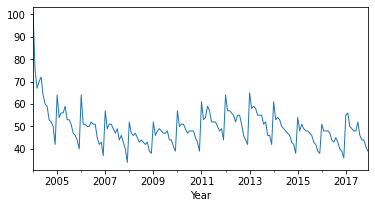

In [26]:
df['diet'].plot(figsize=(6,3), linewidth=1)
plt.xlabel('Year', fontsize=10)

Text(0.5, 0, 'Year')

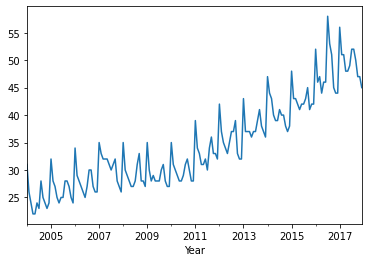

In [25]:
df['gym'].plot(figsize=(6,4))
plt.xlabel('Year', fontsize=10)

<Figure size 576x360 with 0 Axes>

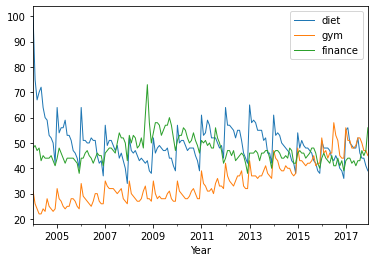

In [21]:
plt.figure(figsize=(8,5))
df.plot(linewidth=1, fontsize=10)

plt.xlabel('Year', fontsize=10);

In [36]:
diet = df[['diet']]
diet.rolling(12).mean()

,diet
month,
2004-01-01,NaN
2004-02-01,NaN
2004-03-01,NaN
2004-04-01,NaN
2004-05-01,NaN
...,...
2017-08-01,46.833333
2017-09-01,46.916667
2017-10-01,47.250000


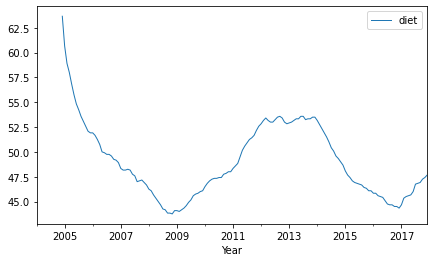

In [31]:
diet.rolling(12).mean().plot(figsize=(7,4), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10);

<Figure size 360x288 with 0 Axes>

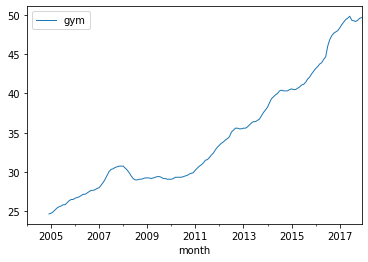

In [35]:
gym=df[['gym']]
plt.figure(figsize=(5,4))
gym.rolling(12).mean().plot(linewidth=1, fontsize=10)

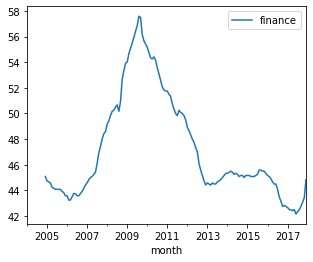

In [38]:
finance=df[['finance']]
finance.rolling(12).mean().plot(figsize=(5,4))

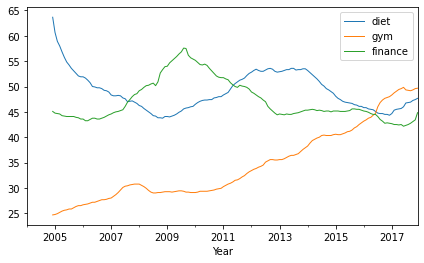

In [40]:
df_full = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean(),finance.rolling(12).mean()], axis=1)
df_full.plot(figsize=(7,4), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10);

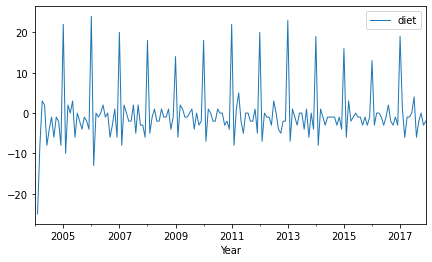

In [41]:
diet.diff().plot(figsize=(7,4), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10);

             diet       gym   finance
diet     1.000000 -0.100764 -0.034639
gym     -0.100764  1.000000 -0.284279
finance -0.034639 -0.284279  1.000000


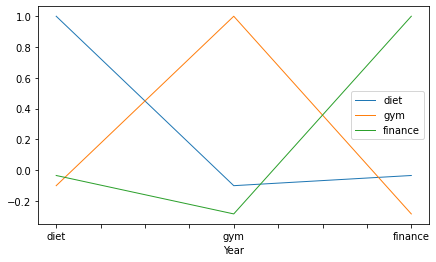

In [44]:
df.corr().plot(figsize=(7,4), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10);
print(df.corr())